# **AVC**

## Imports

In [15]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

### lendo data frame

In [16]:
df = pd.read_csv('dados/archive/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Transformando data frame em matriz one hot encoding

In [17]:
df_ = pd.get_dummies(df)
df_ = df_.dropna()
df_.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


### Separando dados de treino e teste

In [18]:
# Importando as bibliotecas necessárias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separando os dados em conjuntos de treino e teste
y = df_['stroke'] # Definindo a variável y como a coluna 'stroke' do dataframe df_
X = df_.drop(['stroke'], axis=1) # Definindo a variável X como todas as colunas do dataframe df_, exceto a coluna 'stroke'
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5) # Separando aleatoriamente X e y em conjuntos de treino e teste usando a função train_test_split da biblioteca Scikit-learn. Neste caso, estamos usando 50% dos dados para treino e 50% para teste.

### Criando modelo através de classificador por avore de decisão

In [19]:
# fazer uma arvore de decisão apartir do modelo de regressão logistica ja feito em cima
from sklearn import tree

# Treinando um modelo de regressão logística
model = DecisionTreeClassifier() # Definindo um objeto da classe LogisticRegression da biblioteca Scikit-learn
model.fit(X_train, y_train) # Treinando o modelo nos dados de treino usando o método fit() do objeto model

# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test) # Usando o método predict() do objeto model para fazer previsões nos dados de teste (X_test) e armazenando o resultado na variável y_pred.

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred) # Calculando a acurácia comparando as respostas verdadeiras (y_test) com as previsões (y_pred) usando a função accuracy_score() da biblioteca Scikit-learn e armazenando o resultado na variável accuracy.
print('Acurácia:', accuracy * 100,"%") # Imprimindo a acurácia na tela.

Acurácia: 91.64969450101833 %


### Plotando a arvore de decisão

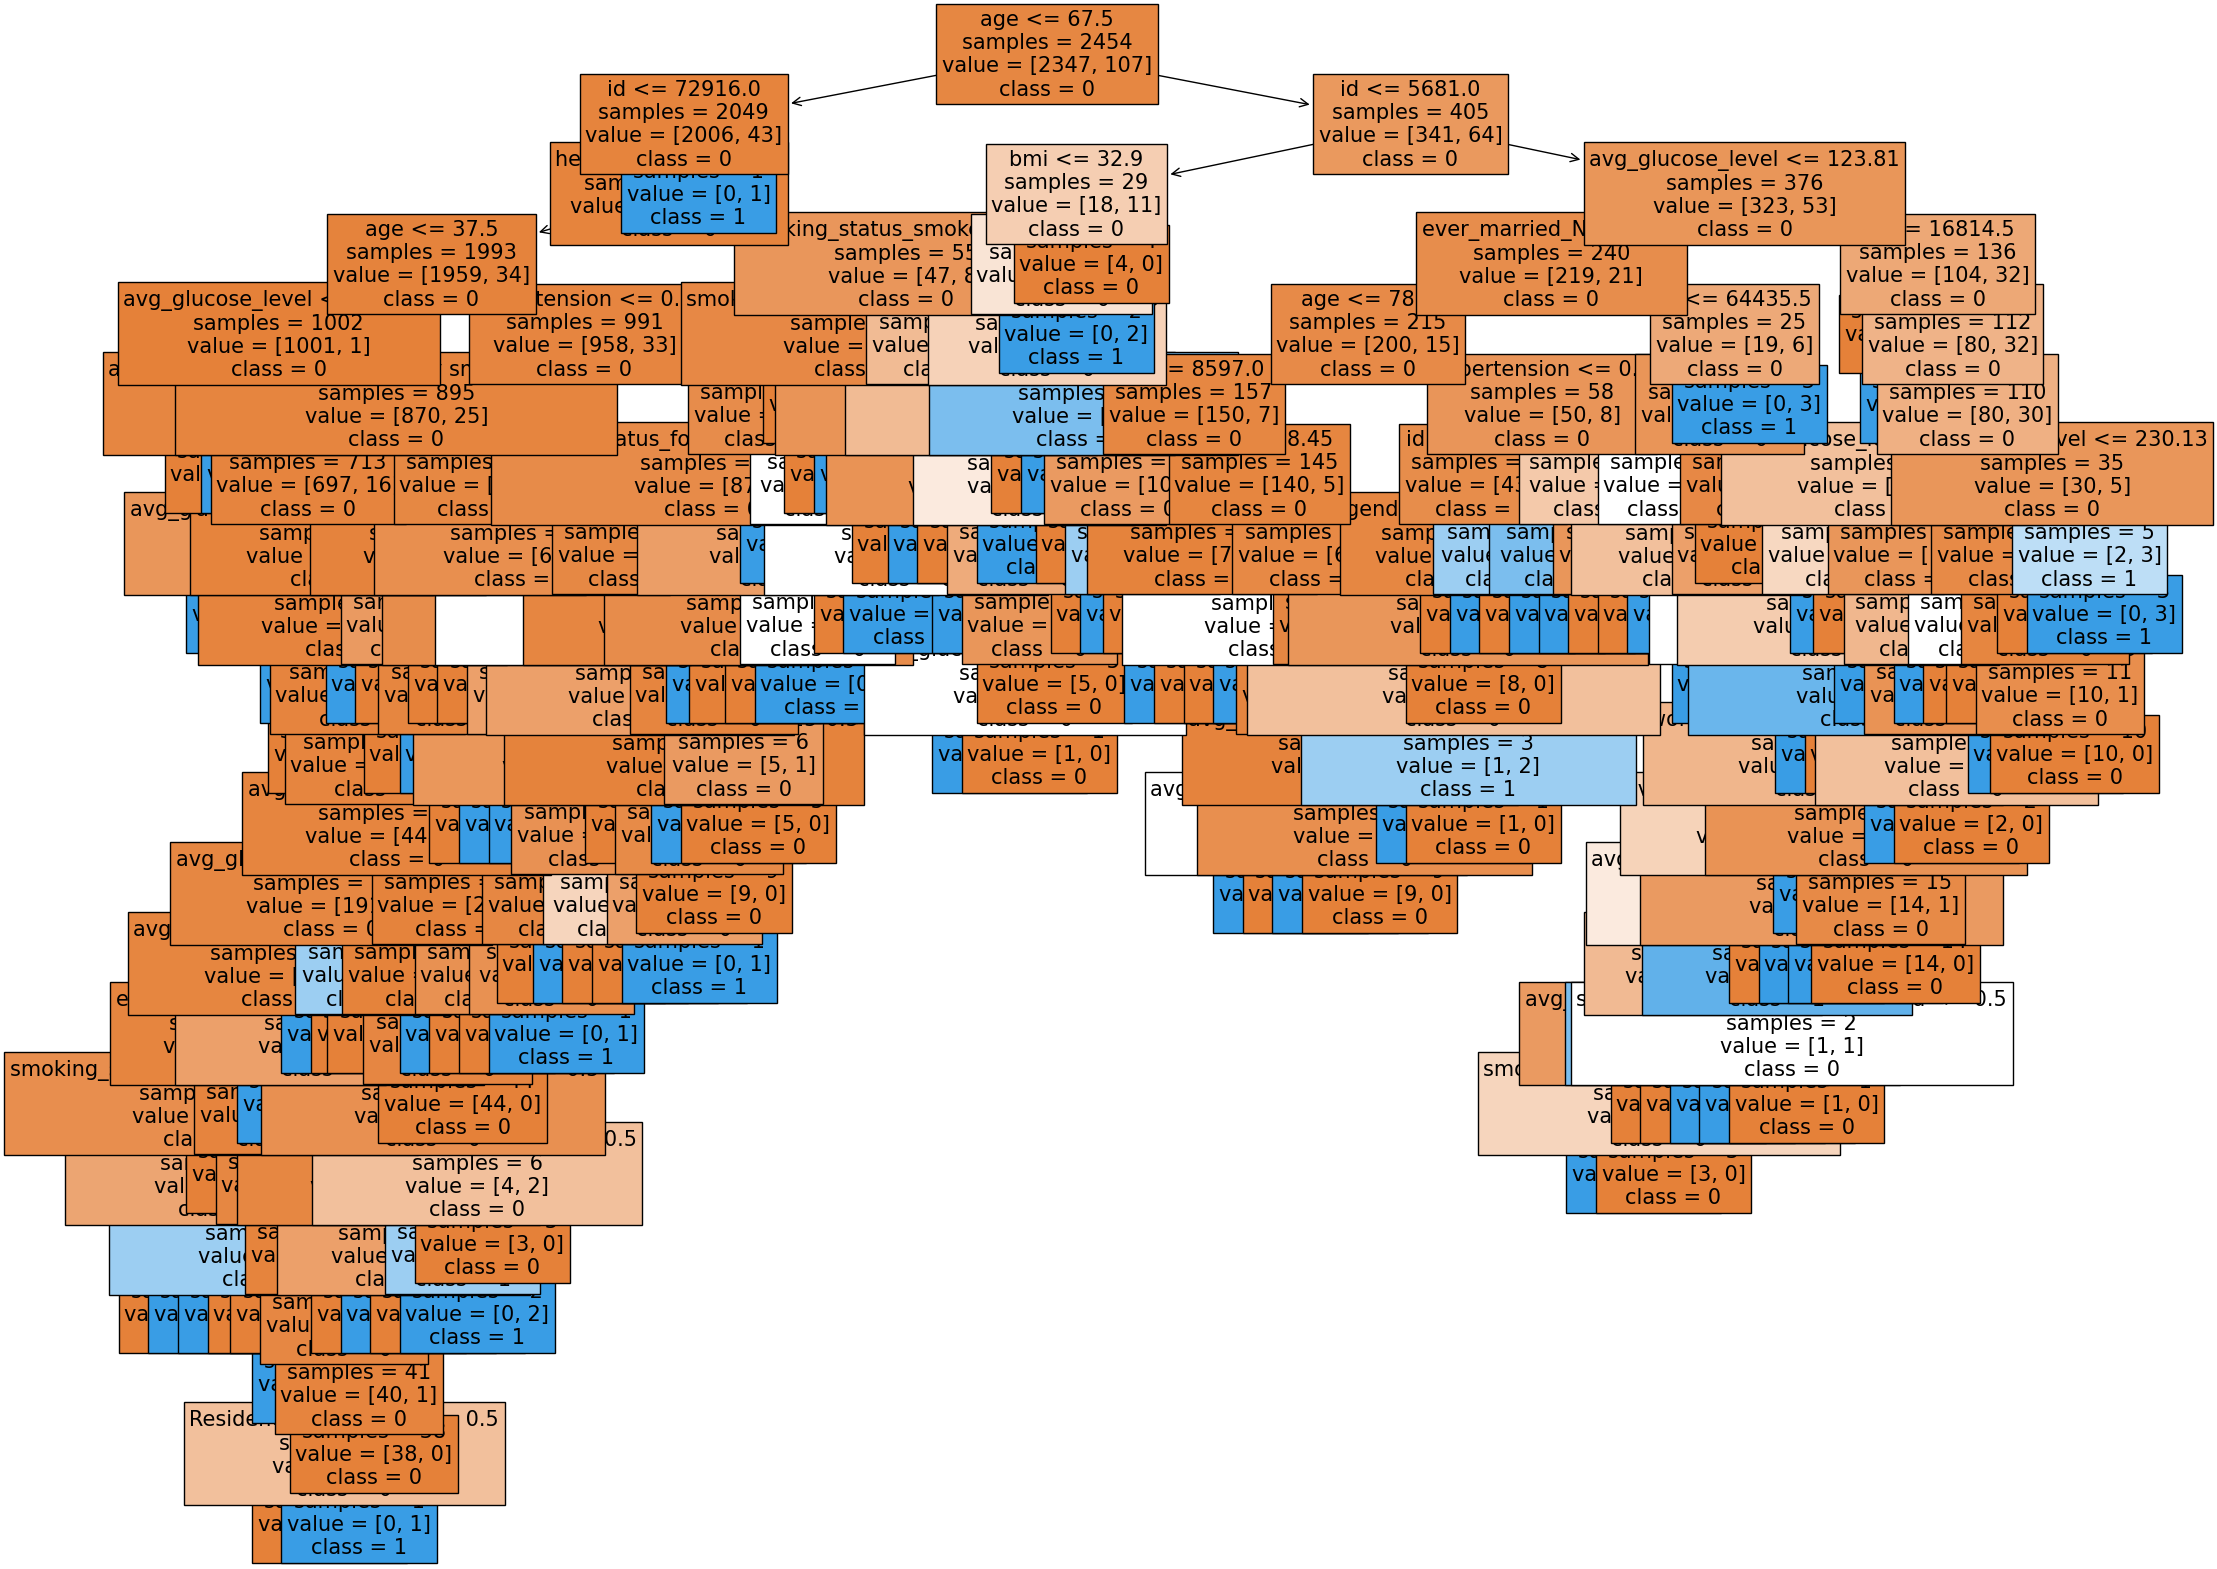

In [20]:
# agora afaça a arvore
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                     feature_names=X.columns,
                        class_names=['0','1'],
                        filled=True, fontsize=15, 
              node_ids=False, impurity=False)